***
# Reading the file
***

In [1]:
with open('cont.csv', 'r') as file:
    text = file.read()

In [2]:
text = text.split('\n')

In [3]:
text[28]

'Timestamp;Time_Offset;100.00;102.00;104.00;106.00;108.00;110.00;112.00;114.00;116.00;118.00;120.00;122.00;124.00;126.00;128.00;130.00;132.00;134.00;136.00;138.00;140.00;142.00;144.00;146.00;148.00;150.00;152.00;154.00;156.00;158.00;160.00;162.00;164.00;166.00;168.00;170.00;172.00;174.00;176.00;178.00;180.00;182.00;184.00;186.00;188.00;190.00;192.00;194.00;196.00;198.00;200.00;202.00;204.00;206.00;208.00;210.00;212.00;214.00;216.00;218.00;220.00;222.00;224.00;226.00;228.00;230.00;232.00;234.00;236.00;238.00;240.00;242.00;244.00;246.00;248.00;250.00;252.00;254.00;256.00;258.00;260.00;262.00;264.00;266.00;268.00;270.00;272.00;274.00;276.00;278.00;280.00;282.00;284.00;286.00;288.00;290.00;292.00;294.00;296.00;298.00;300.00;302.00;304.00;306.00;308.00;310.00;312.00;314.00;316.00;318.00;320.00;322.00;324.00;326.00;328.00;330.00;332.00;334.00;336.00;338.00;340.00;342.00;344.00;346.00;348.00;350.00;352.00;354.00;356.00;358.00;360.00;362.00;364.00;366.00;368.00;370.00;372.00;374.00;376.00;378.

In [4]:
data = []

for line in text:
    candidate = line.split(';')
    if len(candidate) > 100:
        data.append(candidate)

len(data)

178

In [5]:
import numpy as np

class TimeResolvedRaman():

    def __init__(self,x,y,time_t,time_s):
        self.props = {}
        self.time_t = time_t
        self.time_s = time_s    
        self.x = np.array(x)
        self.y = np.array(y)
        self.yn = np.array(y)/np.max(y)

    def set_prop(self,key,value):
        self.props[key] = value

In [6]:
wavenumbers = data.pop(0)[2:]
x_axis = []

for e in wavenumbers:
    x_axis.append(float(e.replace(',', '.')))

In [8]:
specs = []

for line in data:
    st_list = line[2:]
    fl_list = []
    for e in st_list:
        fl_list.append(float(e.replace(',', '.')))
    raman = TimeResolvedRaman(x_axis, fl_list, line[1], line[0])
    specs.append(raman)

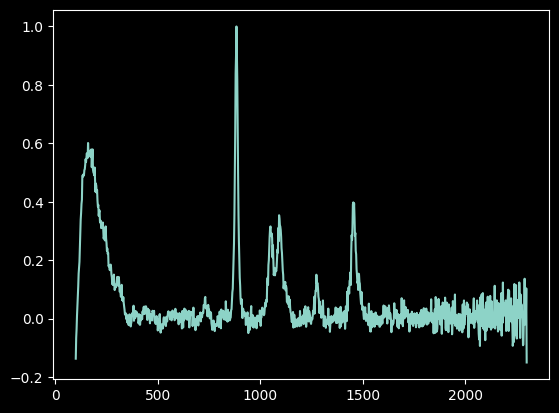

In [9]:
import matplotlib.pyplot as plt
plt.plot(specs[0].x, specs[0].yn)

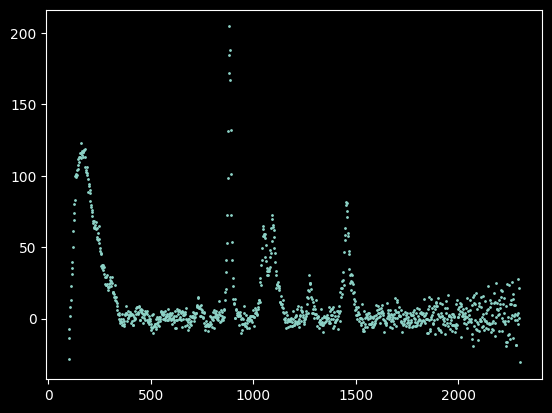

In [10]:
import matplotlib.pyplot as plt
x,y = specs[0].x, specs[0].y
plt.scatter(x, y, s=1)

***
# Plots and More
***

In [15]:
name = 0

for e in specs:
    plt.scatter(e.x, e.y, s=1)
    # Cleaning the plot
    plt.ylim(-10, 800)
    plt.xlim(100, 2000)
    # Saving the plot as a png
    plt.title('Time: '+str(e.time_s)+'s')
    plt.savefig('ign_output/'+str(name)+'.png', dpi=300)
    name += 1
    plt.clf()

<Figure size 640x480 with 0 Axes>

***
# Save files and mp4 stuff
***

In [24]:
import cv2
import numpy as np
import glob

img_array = []
for i in range(0,177):
    img = cv2.imread('ign_norm_init/'+str(i)+'.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('norm_init.MP4',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


***
# Compile plots as mp4
***

In [11]:
for e in yf:
    print(e.time_s)

10/14/2023 12:16:32 AM
10/14/2023 12:16:34 AM
10/14/2023 12:16:36 AM
10/14/2023 12:16:38 AM
10/14/2023 12:16:41 AM
10/14/2023 12:16:43 AM
10/14/2023 12:16:45 AM
10/14/2023 12:16:47 AM
10/14/2023 12:16:49 AM
10/14/2023 12:16:51 AM
10/14/2023 12:16:54 AM
10/14/2023 12:16:56 AM
10/14/2023 12:16:58 AM
10/14/2023 12:17:00 AM
10/14/2023 12:17:02 AM
10/14/2023 12:17:04 AM
10/14/2023 12:17:07 AM
10/14/2023 12:17:09 AM
10/14/2023 12:17:11 AM
10/14/2023 12:17:13 AM
10/14/2023 12:17:15 AM
10/14/2023 12:17:18 AM
10/14/2023 12:17:20 AM
10/14/2023 12:17:22 AM
10/14/2023 12:17:24 AM
10/14/2023 12:17:26 AM
10/14/2023 12:17:28 AM
10/14/2023 12:17:31 AM
10/14/2023 12:17:33 AM
10/14/2023 12:17:35 AM
10/14/2023 12:17:37 AM
10/14/2023 12:17:39 AM
10/14/2023 12:17:42 AM
10/14/2023 12:17:44 AM
10/14/2023 12:17:46 AM
10/14/2023 12:17:48 AM
10/14/2023 12:17:50 AM
10/14/2023 12:17:52 AM
10/14/2023 12:17:55 AM
10/14/2023 12:17:57 AM
10/14/2023 12:17:59 AM
10/14/2023 12:18:01 AM
10/14/2023 12:18:03 AM
10/14/2023 

In [19]:
number = 0
for e in yf:
    name = str(number)
    number += 1
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(e.x, e.y, color='red')
    ax.set_title(e.time_s)
    ax.set_xlabel('Wavenumber (cm-1)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.set_xlim(100, 500)
    ax.set_ylim(0, 800)
    plt.savefig('ign_evolution_a/'+name+'.png')
    plt.close()

***
# Normalization
***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


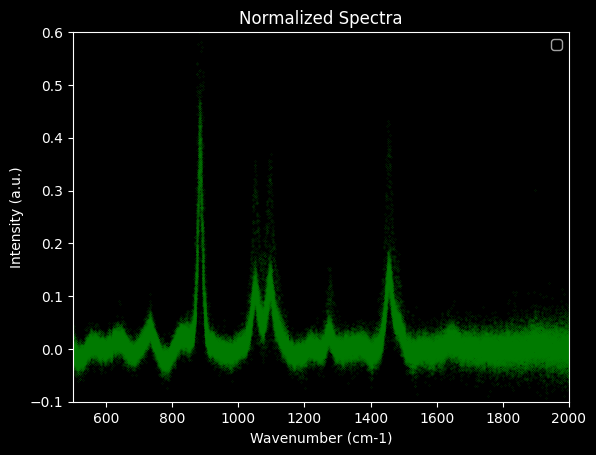

In [35]:
# Normalizing all the spectra 

import matplotlib.pyplot as plt

normalized = []

for i in range(len(yf)):
    norm = []
    for e in yf[i].y:
        norm.append(e/max(yf[i].y))
    normalized.append(norm)

# Plotting the normalized spectra
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(normalized)):
    ax.scatter(yf[i].x, normalized[i], s=0.01, color='green')  # Set the color to green

ax.set_title('Normalized Spectra')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlim(500, 2000)
ax.set_ylim(-0.1,0.6)  # Set the x-axis limits
ax.legend()

plt.show()


***
# Normalization
***

In [24]:
# normalizing each spec in specs

normalized = []

for e in specs:
    norm = []
    for i in range(len(e.y)):
        norm.append(e.y[i]/max(e.y))
    normalized.append(norm)

# Plotting the normalized spectra

nor_name = 0

for e in normalized:
    plt.scatter(x, e, s=0.1, color='green')  # Set the color to green
    plt.xlim(100, 2000)
    plt.ylim(-0.1,1)  # Set the x-axis limits
    # Saving the plot as a png
    plt.savefig('norm_output/'+str(nor_name)+'.png', dpi=300)
    nor_name += 1
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import glob

img_array = []
for i in range(0,177):
    img = cv2.imread('ign_evolution_a/'+str(i)+'.png.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('evolution_a.MP4',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


***
# Creating another videos
***

In [23]:
# Now we integrate all the images within the spexs directory 
# as a single mp4 video

import cv2
import numpy as np
import glob

img_array = []

for filename in glob.glob('ign_out/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('project_2.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


Text(0, 0.5, 'R.I.')

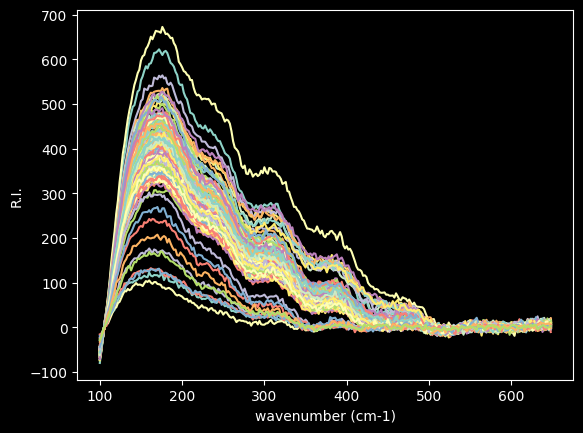

In [8]:
n = int(len(xf) * 0.25)

for e in yf:
    plt.plot(xf[:n], e[:n])

# Title of the axis

plt.xlabel('wavenumber (cm-1)')
plt.ylabel('R.I.')

***
# Saving the file
***

In [10]:
# Converting the xf and yf into an excel file

import pandas as pd

df = pd.DataFrame(yf, index = range(1, len(yf) + 1), columns = xf)


In [12]:
# Saving the dataframe as an excel file

df.to_excel('cont.xlsx')

***
# Reading the initial and final points
***

In [11]:
with open('comparacion/final.csv', 'r') as file:
    final = file.read()

final = final.split('\n')

with open('comparacion/inicial.csv', 'r') as file:
    inicial = file.read()

inicial = inicial.split('\n')


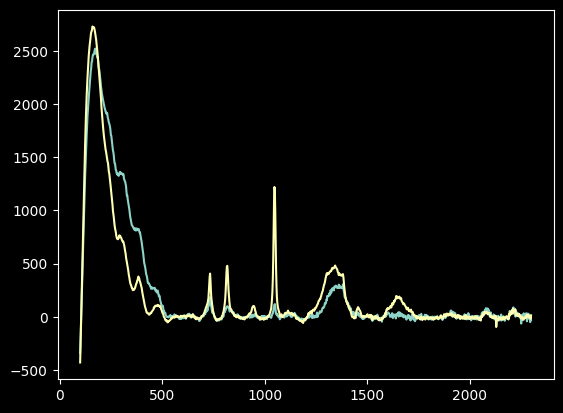

In [12]:
import matplotlib.pyplot as plt

x,y = [],[]
xf, yf = [],[]
for line in inicial[32:]:
    line = line.split(';')
    x.append(float(line[0]))
    y.append(float(line[1]))

for line in final[32:]:
    line = line.split(';')
    xf.append(float(line[0]))
    yf.append(float(line[1]))

# Plotting the initial and final spectra

plt.plot(x,y, label = 'initial')
plt.plot(xf,yf, label = 'final')

In [13]:
in_tr = TimeResolvedRaman(x,y,'Initial','Initial')
fi_tr = TimeResolvedRaman(xf,yf,'Final','Final')

***
# Substracting init and final points
***

(-10.0, 3000.0)

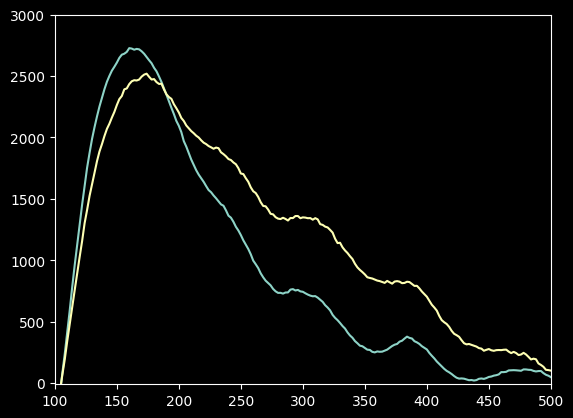

In [34]:
plt.plot(xf,yf, label = 'final')
plt.plot(x,y, label = 'initial')
plt.xlim(100, 500)
plt.ylim(-10, 3000)

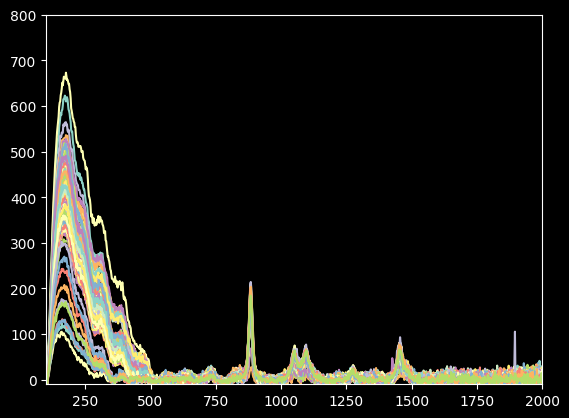

In [24]:
# Now we proceed to plot all the specs in the same plot

for e in specs:
    plt.plot(e.x, e.y)    
    plt.xlim(100, 2000)
    plt.ylim(-10, 800)


***
# Substracting init and final points
***

In [18]:
spec = specs[0]

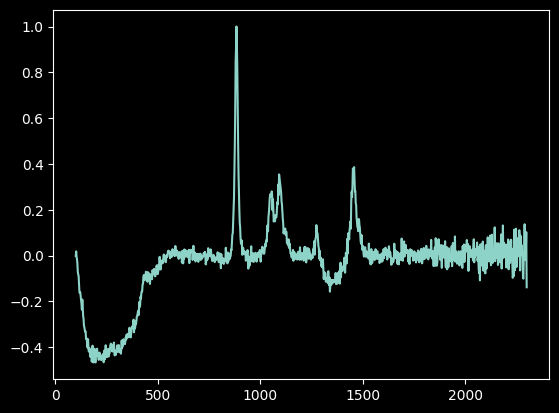

In [19]:
plt.plot(in_tr.x,spec.yn - in_tr.yn)

In [21]:
name = 0

for e in specs:
    plt.plot(e.x, e.yn - in_tr.yn)
    plt.title(e.time_s)
    plt.savefig('ign_norm_init/'+str(name)+'.png', dpi=300)
    plt.xlim(100, 2000)
    plt.ylim(-0.1, 1.1)
    name += 1
    plt.clf()

<Figure size 640x480 with 0 Axes>